In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
print(x_train.shape,x_test.shape) #3 for 3 dimensional array rgb channels

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_train,y_test

(array([6, 9, 9, ..., 9, 1, 1], dtype=uint8),
 array([3, 8, 8, ..., 5, 1, 7], dtype=uint8))

In [ ]:
classes=['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(10,3))
  plt.imshow(x[index])
  plt.xlabel((classes[y[index]]))

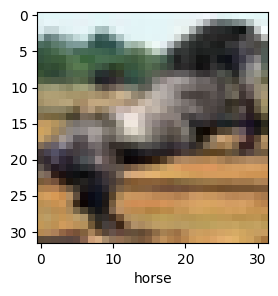

In [ ]:
plot_sample(x_train,y_train, 113)

In [ ]:
x_train=x_train/255.0 #data normalization from 0-1
x_test=x_test/255.0

In [ ]:
#now we will build a simple ann to check how it works before building an cnn

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #used to flatten the input, which means it reshapes the input tensor into a 1D array.
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [ ]:
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 122s 78ms/step - loss: 1.8150 - accuracy: 0.3529
Epoch 2/3
1563/1563 [==============================] - 121s 78ms/step - loss: 1.6247 - accuracy: 0.4271
Epoch 3/3
1563/1563 [==============================] - 125s 80ms/step - loss: 1.5419 - accuracy: 0.4570


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('classification : \n',classification_report(y_test, y_pred_classes))


313/313 [==============================] - 8s 24ms/step
classification : 
               precision    recall  f1-score   support

           0       0.41      0.65      0.51      1000
           1       0.55      0.62      0.58      1000
           2       0.36      0.31      0.33      1000
           3       0.37      0.26      0.31      1000
           4       0.56      0.22      0.31      1000
           5       0.40      0.33      0.36      1000
           6       0.50      0.55      0.52      1000
           7       0.45      0.60      0.51      1000
           8       0.60      0.61      0.60      1000
           9       0.50      0.54      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer="SGD",loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 101s 64ms/step - loss: 1.9831 - accuracy: 0.2800
Epoch 2/15
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5531 - accuracy: 0.4426
Epoch 3/15
1563/1563 [==============================] - 91s 58ms/step - loss: 1.3791 - accuracy: 0.5077
Epoch 4/15
1563/1563 [==============================] - 87s 56ms/step - loss: 1.2587 - accuracy: 0.5554
Epoch 5/15
1563/1563 [==============================] - 88s 56ms/step - loss: 1.1573 - accuracy: 0.5955
Epoch 6/15
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0690 - accuracy: 0.6247
Epoch 7/15
1563/1563 [==============================] - 90s 58ms/step - loss: 0.9836 - accuracy: 0.6590
Epoch 8/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9028 - accuracy: 0.6862
Epoch 9/15
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8260 - accuracy: 0.7136
Epoch 10/15
1563/1563 [==============================] - 85s 54

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1821 - accuracy: 0.6634


[1.1820605993270874, 0.6633999943733215]